# Importaant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

import joblib

# Data Loading and Preprocessing:

In [2]:
df = pd.read_csv("malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


#### Check Nulls 

In [3]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [4]:
set(df.duplicated())

{False, True}

In [5]:
df.duplicated().sum()

10066

In [6]:
df = df.drop_duplicates(subset=['url'])

In [7]:
df.duplicated().sum()

0

In [8]:
set(df.duplicated())

{False}

# EDA and Visualization:



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641119 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     641119 non-null  object
 1   type    641119 non-null  object
dtypes: object(2)
memory usage: 14.7+ MB


In [10]:
df.describe().T

,count,unique,top,freq
url,641119,641119,br-icloud.com.br,1
type,641119,4,benign,428080


In [11]:
df['url'] = df['url'].replace('www.', '', regex=True)
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [26]:
set(df['type'])

{'benign', 'defacement', 'malware', 'phishing'}

In [12]:
cats = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
df['Category'] = df['type']
df = df.replace(cats)

# Label Encoding:



# Train-Test Split:



In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['url'],df['type'], train_size=.8)

# Feature Extraction (Count Vectorization):



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
featurizer = CountVectorizer()
X_train_count = featurizer.fit_transform(X_train.values)

In [15]:
X_train_count

<512895x499218 sparse matrix of type '<class 'numpy.int64'>'
	with 4071775 stored elements in Compressed Sparse Row format>

# Model Training:



In [16]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [17]:
X_test_count = featurizer.transform(X_test)
model.score(X_test_count, y_test)

0.9045264537060145

In [18]:
urls = [
    'https://chat.openai.com/c/241c613f-b808-495d-8d78-63703bded700',
    'https://www.linkedin.com/groups/7036558/?highlightedUpdateUrn=urn%3Ali%3AgroupPost%3A7036558-7161692324958199809&q=highlightedFeedForGroups'
]
urls_count = featurizer.transform(urls)
model.predict(urls_count)

array(['phishing', 'benign'], dtype='<U10')

# Confusion Matrix Visualization:

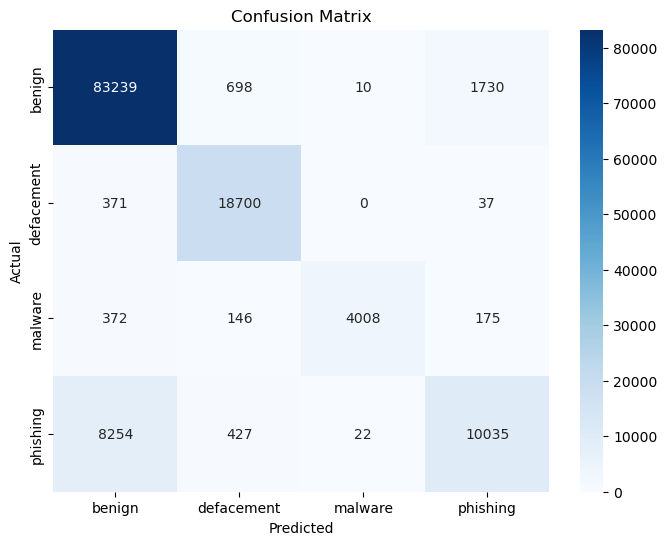

In [28]:
y_pred = model.predict(X_test_count)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'defacement', 'malware', 'phishing'], yticklabels=['benign', 'defacement', 'malware', 'phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:

# Save the model to a file
joblib.dump(model, 'model.pkl')


['model.pkl']

In [21]:
joblib.dump(model, 'model.pkl', compress=True)


['model.pkl']

In [22]:
# Save both the model and CountVectorizer
joblib.dump((model, featurizer), 'model_and_featurizer.pkl', compress=True)


['model_and_featurizer.pkl']

In [23]:
# Load both the model and CountVectorizer
model, featurizer = joblib.load('model_and_featurizer.pkl')


In [24]:
# Initialize CountVectorizer and fit on training data
featurizer = CountVectorizer()
featurizer.fit(X_train)


CountVectorizer()

In [25]:
print(len(featurizer.vocabulary_))


499218
